In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import preprocessing;
#from sklearn.model_selection import cross_validation;
from sklearn.model_selection import train_test_split
from sklearn import linear_model;


In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("prices.csv"))

def prepare_data(df,forecast_col,forecast_out,test_size):

    a1 = df[forecast_col].shift(1)
    a2 = df[forecast_col].shift(2)
    df = df.join(a1, rsuffix='_yesterday')
    df = df.join(a2, rsuffix='_dayb4_yesterday')
    #df = df[:-forecast_out]
    df = df[2:] # to remove na values in new columns occured due to shift down
    
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows as nan

    df1 = df.join(label, rsuffix='_frcst')
    

    X = df1[[forecast_col, 'close_yesterday', 'close_dayb4_yesterday']]; #creating the feature array
    #X = np.array(df1[[forecast_col, 'close_yesterday', 'close_dayb4_yesterday']]); #creating the feature array
    
    ## Below i am going to  create a new dataframe with 2 columns to find correlations and scatter plots 
    ## OLD CODE, NOT REQUIRED
    #a = np.array(df[forecast_col])
    #a = a[:-forecast_out]
    #b = df[forecast_col].shift(-forecast_out)
    #b.dropna(inplace = True)
    #b = np.array(b)
    #dict = {'close': a , 'close_frcst': b}
    #df1 = pd.DataFrame(data = dict)
    
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method X_Lately = df[]
    
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    
    y = label  # assigning Y
    #y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size= test_size) # 

    response = [X_train,X_test , Y_train, Y_test , X_lately, X, y, df1];
    return response;


In [3]:
from IPython.display import display, HTML


df = pd.read_csv("prices.csv") #loading the csv file

display(HTML(df.head(500).to_html()))

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [4]:
df = pd.read_csv("prices.csv") #loading the csv file
print(len(df['symbol'].unique()))
df['symbol'].value_counts()


501


CTAS    1762
STI     1762
WYNN    1762
AON     1762
EFX     1762
MSI     1762
CI      1762
FE      1762
KR      1762
ROK     1762
UNH     1762
EQR     1762
FISV    1762
CCI     1762
FLR     1762
SLG     1762
EW      1762
FMC     1762
MET     1762
CL      1762
DUK     1762
BWA     1762
DOW     1762
COL     1762
ULTA    1762
NRG     1762
STT     1762
PXD     1762
DHI     1762
MA      1762
        ... 
HCA     1008
NLSN    1008
TDG     1008
ABBV    1008
FB      1008
TRIP    1008
KMI     1008
PSX     1008
XYL     1008
MPC     1008
KORS    1008
FBHS    1008
ZTS      987
COTY     896
MNK      894
NWS      892
NWSA     892
EVHC     853
ALLE     786
QRVO     504
CFG      504
SYF      504
NAVI     504
WRK      385
PYPL     378
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [5]:
df=df[df.symbol=='CSCO'] #choosing stock symbol


## Defining Training and Testing data and finding correlation between variables

In [6]:



forecast_col = 'close'#choosing which column to forecast
forecast_out = 5 #how far to forecast 
test_size = 0.2; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately, X, y, df1 = prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

df1.dropna(inplace = True) # to drop last 5 na values from df1
#Finding correlation by 2 methods

#first method
print(df1[['close','close_yesterday','close_dayb4_yesterday','close_frcst']].corr())

print('')

# second method
from scipy.stats import pearsonr
coeff, _ = pearsonr(df1['close'], df1['close_frcst'])
print('Pearson Coefficient between close and close_frcst: ',coeff)

                          close  close_yesterday  close_dayb4_yesterday  \
close                  1.000000         0.996456               0.992987   
close_yesterday        0.996456         1.000000               0.996451   
close_dayb4_yesterday  0.992987         0.996451               1.000000   
close_frcst            0.982552         0.979169               0.975916   

                       close_frcst  
close                     0.982552  
close_yesterday           0.979169  
close_dayb4_yesterday     0.975916  
close_frcst               1.000000  

Pearson Coefficient between close and close_frcst:  0.982551805806679


In [7]:
print(type(X_test))

<class 'numpy.ndarray'>


In [8]:
print(X_test.shape)
print(Y_test.shape)

(351, 3)
(351,)


## Scatter Plot Between Variables Close and Close_Forecast 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Close_Forecast')

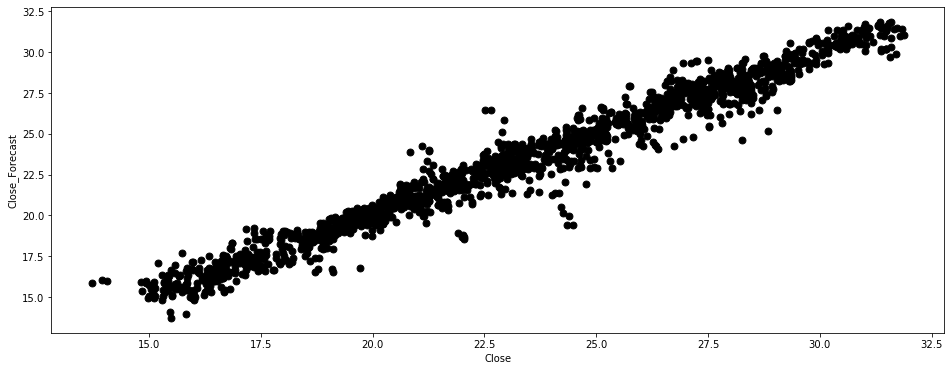

In [10]:
## Here we will visualize the relationship between close and close_forecast variable
import matplotlib.pyplot as plt 
colors = (0,0,0)
area = np.pi*15

# relation between X and Y variable Plot
plt.figure(figsize=(16, 6))

plt.scatter(df1['close'], df1['close_frcst'], s=area, c=colors)
plt.xlabel("Close")
plt.ylabel("Close_Forecast")
#plt.scatter(X_train, Y_train)

## Scatter Plots for all variables with respect to one another

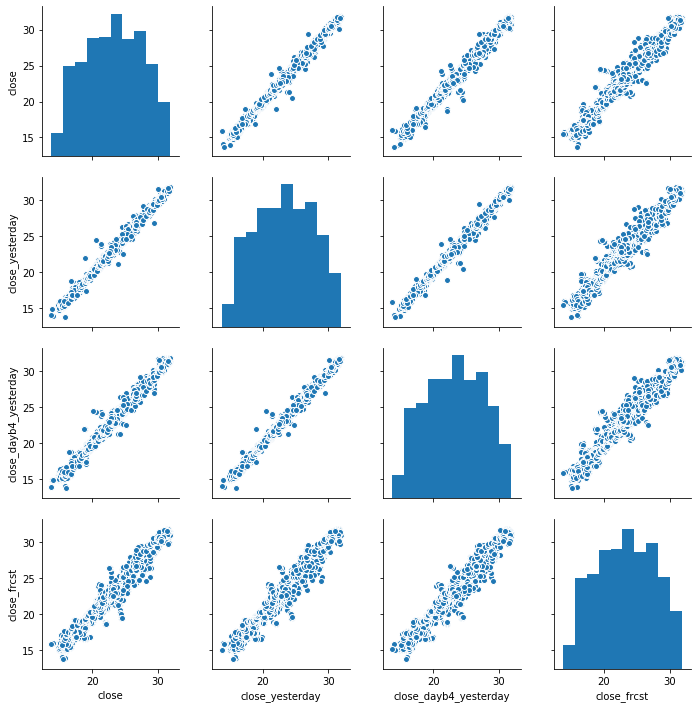

In [11]:
import seaborn as sns
# VISUALIZING THE SCATTER PLOT OF X VARIABLES WITH Y VARIABLE
sns.pairplot(df1[['close','close_yesterday','close_dayb4_yesterday','close_frcst']])

## Linear Regression Model

In [12]:
learner = linear_model.LinearRegression(); #initializing linear regression model

learner.fit(X_train,Y_train); #training the linear regression model
score=learner.score(X_test,Y_test);#testing the linear regression model

In [13]:
print('Score: ',score)


Score:  0.9665026883374672


In [14]:
y_predict = learner.predict(X_lately)
y_predict

array([30.43055102, 30.57429665, 30.33252568, 30.37065313, 30.13763193])

In [15]:
(X_test)

array([[ 0.97713835,  1.04060745,  1.08353828],
       [ 0.0149588 ,  0.02949409,  0.05096714],
       [ 1.09425325,  0.98545603,  1.05824122],
       ...,
       [-0.44890762, -0.39103725, -0.42967221],
       [-1.88184316, -1.93068772, -1.87619129],
       [-1.81065567, -1.77672269, -1.86239301]])

Text(0, 0.5, 'Close_Forecast')

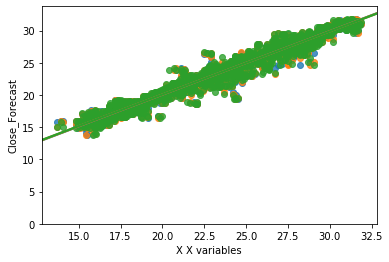

In [16]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')

# Regression Plot
import seaborn as sns
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X Variables')
plt.ylabel('Close_Forecast')

# Regression Plot
import seaborn as sns
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X X variables')
plt.ylabel('Close_Forecast')


In [17]:
X_test

array([[ 0.97713835,  1.04060745,  1.08353828],
       [ 0.0149588 ,  0.02949409,  0.05096714],
       [ 1.09425325,  0.98545603,  1.05824122],
       ...,
       [-0.44890762, -0.39103725, -0.42967221],
       [-1.88184316, -1.93068772, -1.87619129],
       [-1.81065567, -1.77672269, -1.86239301]])

In [18]:
 # taking columns individually from X_test, as we can't access columns directly from X_test because X_test is a list of list for all 3 columns
 close_test = pd.Series((row[0] for row in X_test)) 
 close1_test  = pd.Series((row[1] for row in X_test))
 close2_test = pd.Series((row[2] for row in X_test))

Plot for Residuals vs Y variable



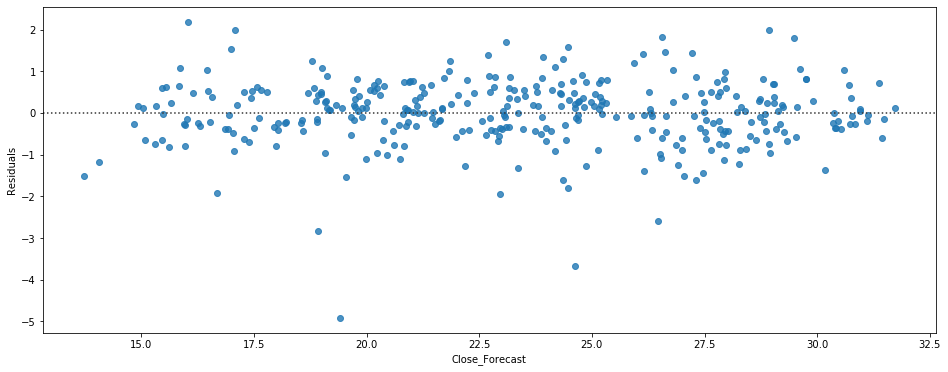

In [19]:
# Residual plot

y_predict =  learner.predict(X_test)
e = Y_test - y_predict # calculating rhe residuals/errors (y_test - y_predict)

#1. Residuals vs Y variable
print('Plot for Residuals vs Y variable')
plt.figure(figsize=(16, 6))
sns.residplot(Y_test, e)
plt.xlabel('Close_Forecast')
plt.ylabel('Residuals')

print('')




Plot for Residuals vs close variable


Text(0, 0.5, 'Residuals')

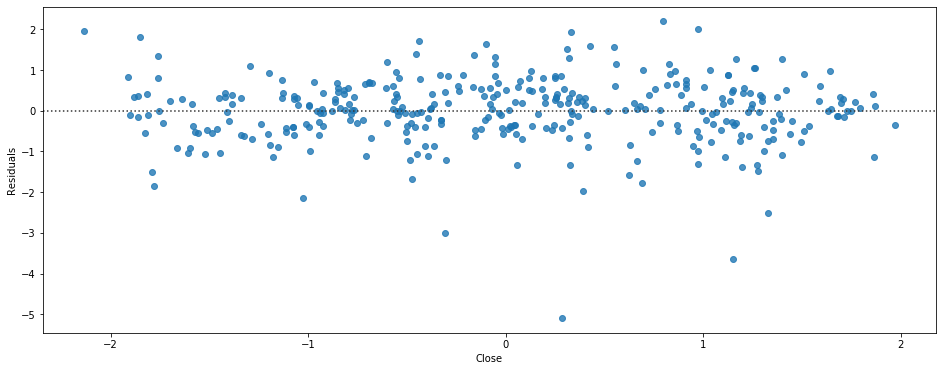

In [20]:
#2. Residuals vs X variables
print('Plot for Residuals vs close variable')
plt.figure(figsize=(16, 6))
sns.residplot(close_test, e)
plt.xlabel('Close')
plt.ylabel('Residuals')

Plot for Residuals vs close_yesterday variable


Text(0, 0.5, 'Residuals')

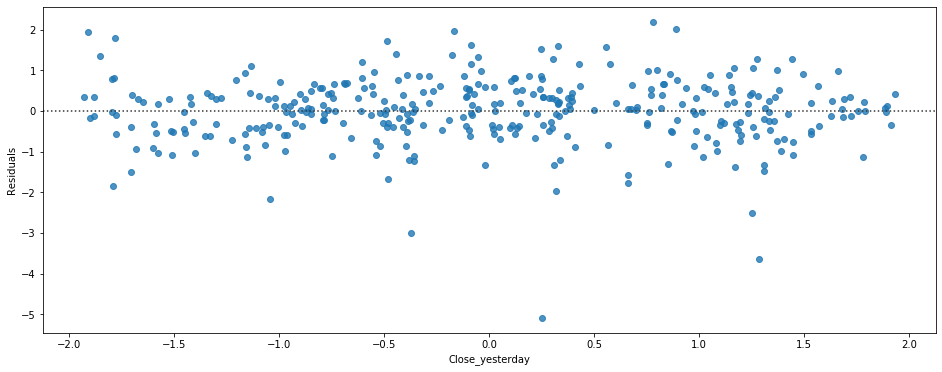

In [21]:
print('Plot for Residuals vs close_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close1_test, e)
plt.xlabel('Close_yesterday')
plt.ylabel('Residuals')

Plot for Residuals vs close_dayb4_yesterday variable


Text(0, 0.5, 'Residuals')

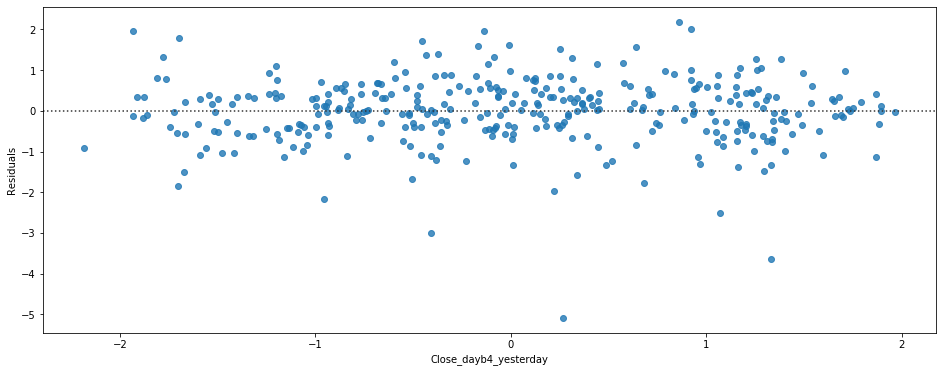

In [22]:
print('Plot for Residuals vs close_dayb4_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close2_test, e)
plt.xlabel('Close_dayb4_yesterday')
plt.ylabel('Residuals')

In [23]:
# MAE
from sklearn.metrics import mean_absolute_error

print('MAE: ',(mean_absolute_error(Y_test, y_predict)))


MAE:  0.5851652114162259


In [24]:
#MSE
from sklearn.metrics import mean_squared_error

print('MSE: ',mean_squared_error(Y_test, y_predict))


MSE:  0.6512015327805035


In [25]:
#rmse
print('RMSE: ',np.sqrt(mean_squared_error(Y_test, y_predict)))


RMSE:  0.8069705897865816


## Linear Regression with Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score

cross_learner = linear_model.LinearRegression()
cv_4_results = cross_val_score(cross_learner, X, y, cv=4 )

# array of 4 different MSE ( due to 4 fold cross validation,the mse is calculated 4 times with each fold )
cv_4_results

# average for MSE 
print('MSE: ',np.mean(cv_4_results))

MSE:  0.8830122017360106


Text(0, 0.5, 'Close_Forecast')

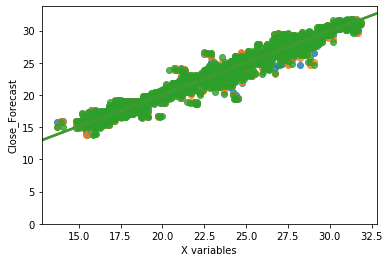

In [27]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')

## Gradient Boosting Regression (GBR)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [29]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = ensemble.GradientBoostingRegressor(**params)

gbr.fit(X_train, Y_train)
print('Score: ',gbr.score(X_test, Y_test))
mse = mean_squared_error(Y_test, gbr.predict(X_test))
print("MSE: %.4f" % mse)

Score:  0.9643133957633888
MSE: 0.6938


Plot for Residuals vs Y variable

Plot for Residuals vs close variable
Plot for Residuals vs close_yesterday variable
Plot for Residuals vs close_dayb4_yesterday variable


Text(0, 0.5, 'Residuals')

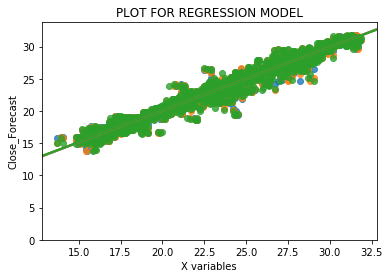

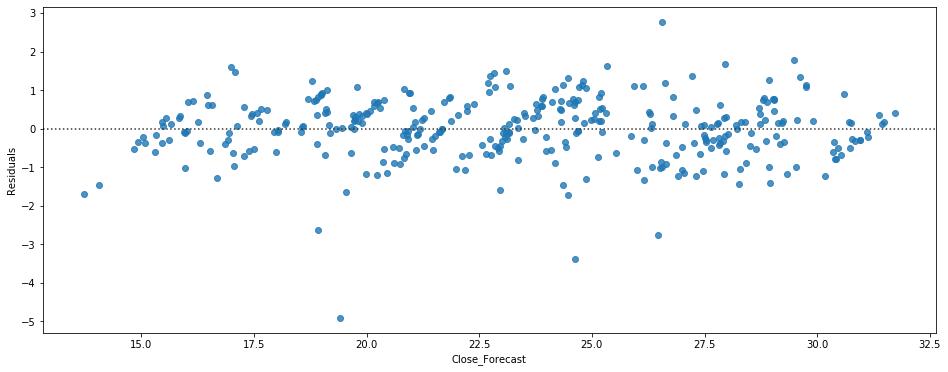

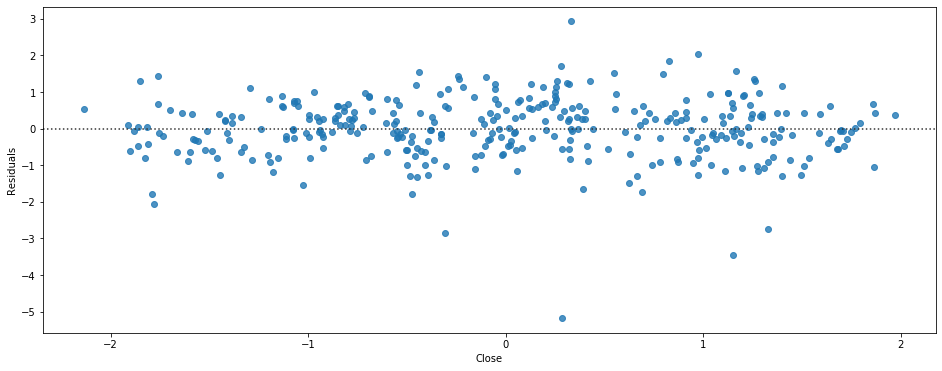

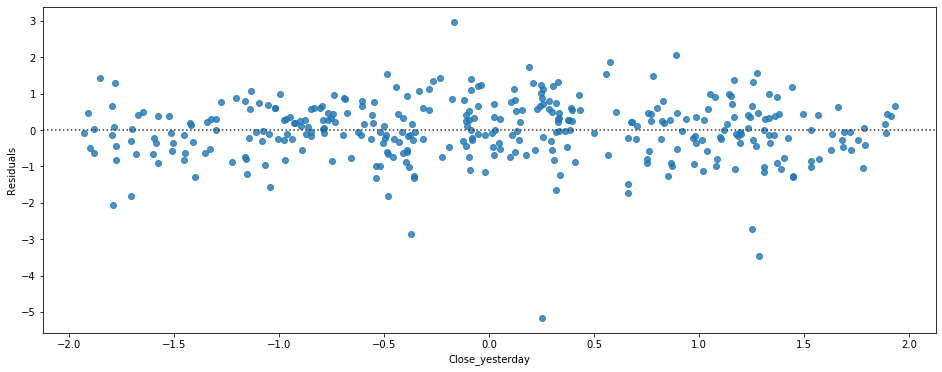

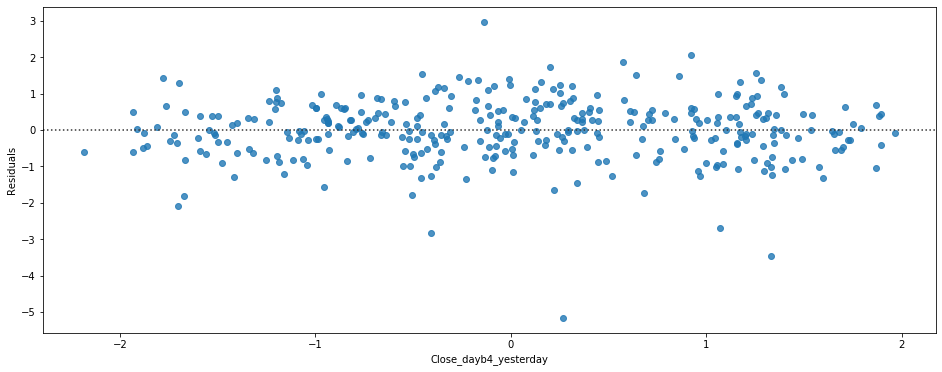

In [30]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.title('PLOT FOR REGRESSION MODEL')
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')


# Residual plot

y_predict =  gbr.predict(X_test)
e = Y_test - y_predict # calculating rhe residuals/errors (y_test - y_predict)

#1. Residual Vs Y
# Residual plot


print('Plot for Residuals vs Y variable')
plt.figure(figsize=(16, 6))
sns.residplot(Y_test, e)
plt.xlabel('Close_Forecast')
plt.ylabel('Residuals')

print('')


#2. Residual vs X variables

print('Plot for Residuals vs close variable')
plt.figure(figsize=(16, 6))
sns.residplot(close_test, e)
plt.xlabel('Close')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close1_test, e)
plt.xlabel('Close_yesterday')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_dayb4_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close2_test, e)
plt.xlabel('Close_dayb4_yesterday')
plt.ylabel('Residuals')

## Extreme Gradient Boosting Regression (XGBR)


In [31]:

import xgboost 
#import xgboost as xgb
xgbr = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

#xgb_clf = XGBClassifier()

xgbr.fit(X_train, Y_train)

score = xgbr.score(X_test, Y_test)
print('Score: ',score)
mse1 = mean_squared_error(Y_test, xgbr.predict(X_test))
print('MSE: ',mse1)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


Score:  0.9450183233770166
MSE:  1.068866434788444


Plot for Residuals vs Y variable

Plot for Residuals vs close variable
Plot for Residuals vs close_yesterday variable
Plot for Residuals vs close_dayb4_yesterday variable


Text(0, 0.5, 'Residuals')

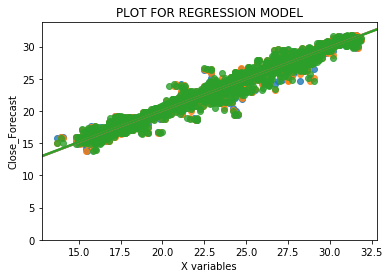

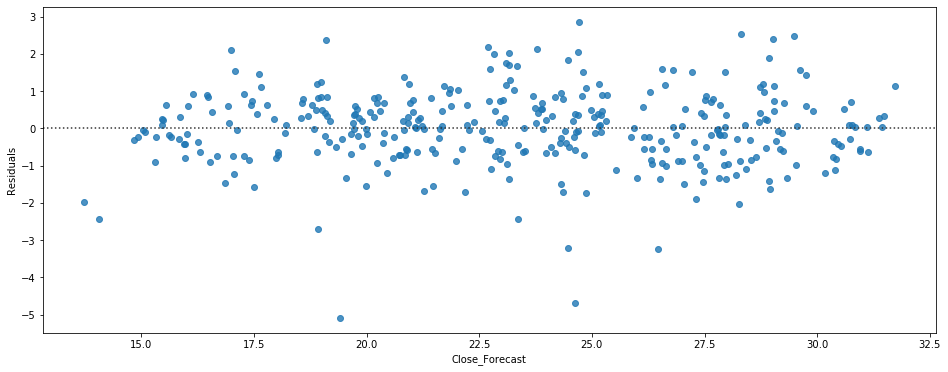

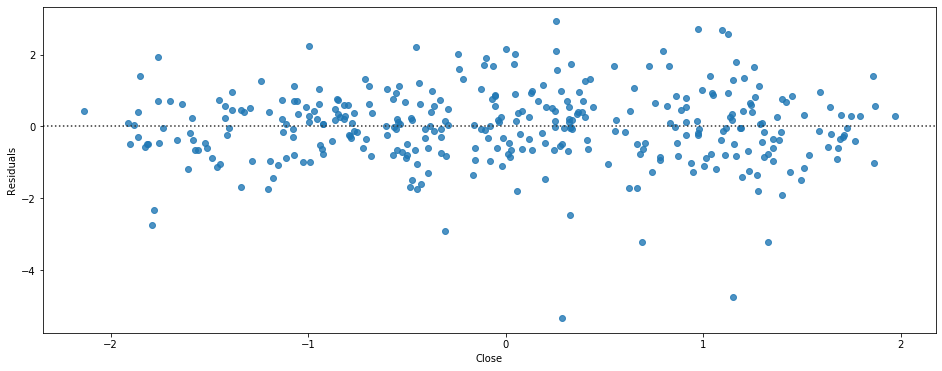

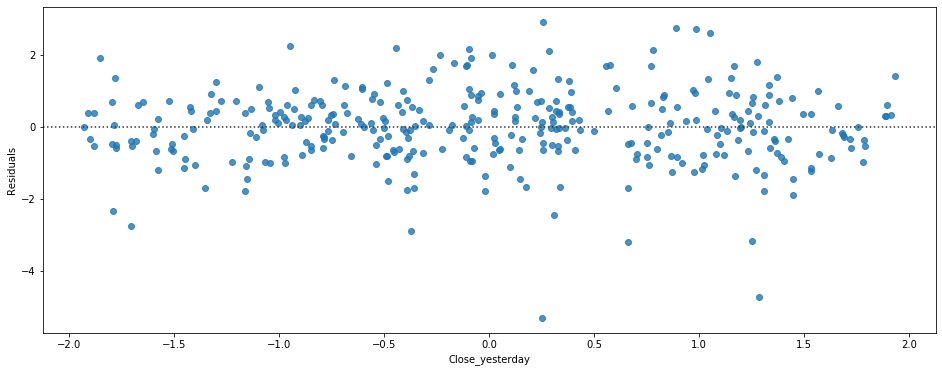

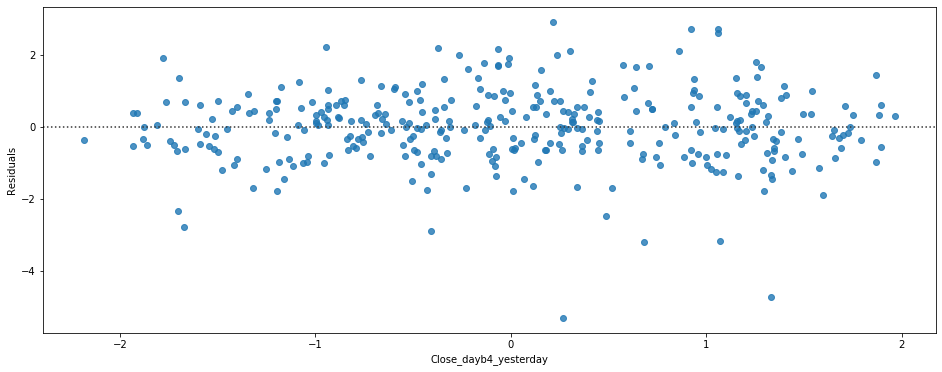

In [32]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.title('PLOT FOR REGRESSION MODEL')
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')


# Residual plot

y_predict =  xgbr.predict(X_test)
e = Y_test - y_predict # calculating rhe residuals/errors (y_test - y_predict)


#1. Residual Vs Y
# Residual plot


print('Plot for Residuals vs Y variable')
plt.figure(figsize=(16, 6))
sns.residplot(Y_test, e)
plt.xlabel('Close_Forecast')
plt.ylabel('Residuals')

print('')


#2. Residuals Vs X variables

print('Plot for Residuals vs close variable')
plt.figure(figsize=(16, 6))
sns.residplot(close_test, e)
plt.xlabel('Close')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close1_test, e)
plt.xlabel('Close_yesterday')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_dayb4_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close2_test, e)
plt.xlabel('Close_dayb4_yesterday')
plt.ylabel('Residuals')

## XGBR With Cross Validation

In [36]:
# WITH CROSS VALIDATION
from sklearn.model_selection import cross_val_score
xgbr_cross = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
cv_4_results = cross_val_score(xgbr_cross, X, y, cv=4 )

# array of 4 different MSE ( due to 4 fold cross validation,the mse is calculated 4 times with each fold )
cv_4_results

# average for MSE 
print('MSE: ',np.mean(cv_4_results))

MSE:  0.7332533835145805


Text(0, 0.5, 'Close_Forecast')

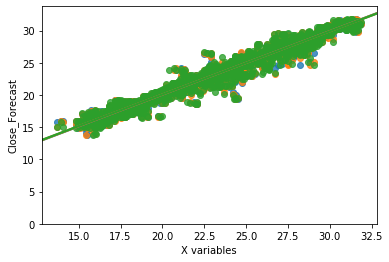

In [34]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')